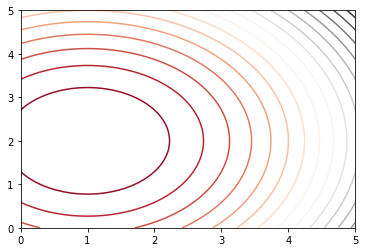

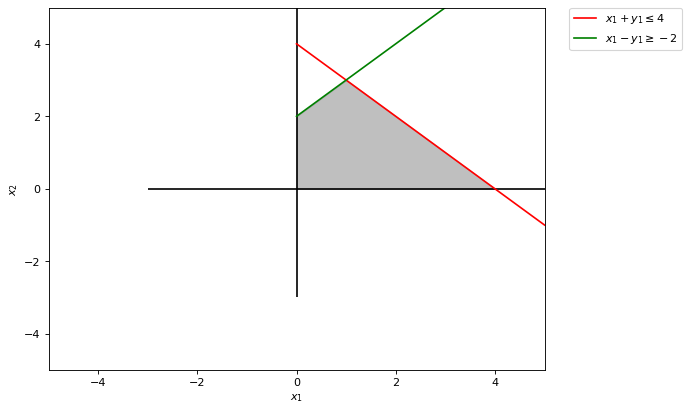

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return -(-x**2 + 2*x - y**2 + 4*y - 5)

x = np.linspace(0, 5, 2000)
y = np.linspace(0, 5, 2000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 20, cmap='RdGy')

# y >= 0
y0 = -(-x**2 + 2*x - y**2 + 4*y - 5)
y1 = (x*0) + 0
y2 = (y*0) + 0
y3 = 4 - x
y4 = 2 + x
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, y3, color='r', label=r'$x_1 + y_1 \leq 4$')
plt.plot(x, y4, color='g', label=r'$x_1 - y_1 \geq -2$')
plt.hlines(0,-3,10,color='k')
plt.vlines(0,-3,10,color='k')
plt.xlim((-5., 5))
plt.ylim((-5., 5))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
#plt.grid(True)

# Fill feasible region
y5 = np.minimum(y3,y4)

plt.fill_between(x, y5, where=(y5>y1) & (y5>y2), color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.fill_between(x, y1, y5,where=y5 >= y1, color='grey', alpha=0.5)


In [1]:
import pandas as pd
import numpy as np
from cvxpy import *

# read monthly_prices.csv
mp = pd.read_csv("monthly_prices.csv",index_col=0)
mr = pd.DataFrame()

# compute monthly returns
for s in mp.columns:
    date = mp.index[0]
    pr0 = mp[s][date] 
    for t in range(1,len(mp.index)):
        date = mp.index[t]
        pr1 = mp[s][date]
        ret = (pr1-pr0)/pr0
        #mr.set_value(date,s,ret)
        mr.at[date,s]=ret
        pr0 = pr1
        
# get symbol names
symbols = mr.columns

# convert monthly return data frame to a numpy matrix
#return_data = mr.as_matrix().T
return_data = mr.values.T

# compute mean return
r = np.asarray(np.mean(return_data, axis=1))

# covariance
C = np.asmatrix(np.cov(return_data))

# print out expected return and std deviation
print("----------------------")
for j in range(len(symbols)):
    print('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))
   

# set up optimization model
n = len(symbols)
x = Variable(n)
req_return = 0.02
ret = r.T*x
risk = quad_form(x, C)
prob = Problem(Minimize(risk), 
               [sum(x) == 1, ret >= req_return, x >= 0])

# solve problem and write solution
try:
    prob.solve()
    print("----------------------")
    print("Optimal portfolio")
    print("----------------------")
    for s in range(len(symbols)):
        #print('x[%s] = %f'%(symbols[s],x.value[s,0]))
        print('x[%s] = %f'%(symbols[s],x.value[s]))
    print("----------------------")
    print('Exp ret = %f' %(ret.value))
    print('risk    = %f' %((risk.value)**0.5))
    print("----------------------")
except:
    print('Error')

----------------------
MSFT: Exp ret = 0.024611, Risk = 0.058040
V: Exp ret = 0.018237, Risk = 0.042807
WMT: Exp ret = 0.009066, Risk = 0.044461
----------------------
Optimal portfolio
----------------------
x[MSFT] = 0.582818
x[V] = 0.204324
x[WMT] = 0.212858
----------------------
Exp ret = 0.020000
risk    = 0.038256
----------------------


c:\users\mjpearl\desktop\omsa\isye-6669-oan\env_isye6669\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [2]:
symbols

c:\users\mjpearl\desktop\omsa\isye-6669-oan\env_isye6669\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['MSFT', 'V', 'WMT'], dtype='object')

In [3]:
x[0]

Expression(AFFINE, UNKNOWN, ())

In [4]:
x.value[0]

0.5828175485022873